<a href="https://colab.research.google.com/github/konkall/Netflix_data_mining/blob/main/NetflixDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Netflix Data Analysis

In this project we are going to explore a dataset that contains Movies/TV Series that are available in the popular streaming platform "Netflix". 

In the first part of this project we're going to visualize some data based on a number of queries that are available below. In the second part we will try to extract useful information from our data in order to build a recommendation system.

In [72]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Import Libraries

In [73]:
# For large and multi-dimensional arrays
import numpy as np
# For data manipulation and analysis
import pandas as pd


# For data vizualization 
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline


#Load Dataset

In [74]:
Location = r'/content/gdrive/MyDrive/DataMining/Εργασίες/Data Mining Netflix/data/netflix_titles.csv' # Τo r κάνει escape όλους τους χαρακτήρες στην συμβολοσειρά

df = pd.read_csv(Location)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


#Preprocessing

The preprocessing of our data will take place before executing each query. This is because we need to take into consideration the nature of each question before deciding how to proprocess our dataset.

#Visualization Queries

## Query 1
What type of media is hosted more in Netflix, Movies or TV Series?

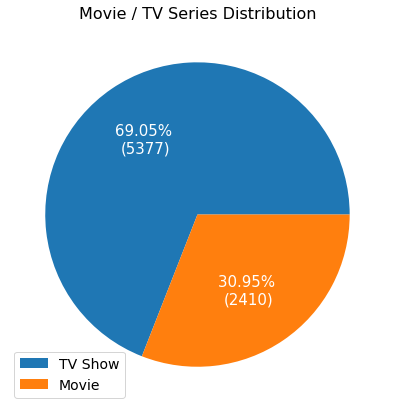

In [ ]:
types_count = df.groupby(['type']).size().to_numpy()

plt.figure(figsize= (7,7))
plt.pie(types_count, textprops={'fontsize':15,'color':'white'}, autopct = lambda p : '{:.2f}% \n({:.0f})'.format(p, (p/100)*types_count.sum()))
plt.title('Movie / TV Series Distribution', fontsize = 16)
plt.axis('off')
plt.legend(labels = df.type.unique(), prop={"size":14}, loc='lower left')
plt.show()

##Query 2
In the last few years Netflix invests more in Movies or TV Series?

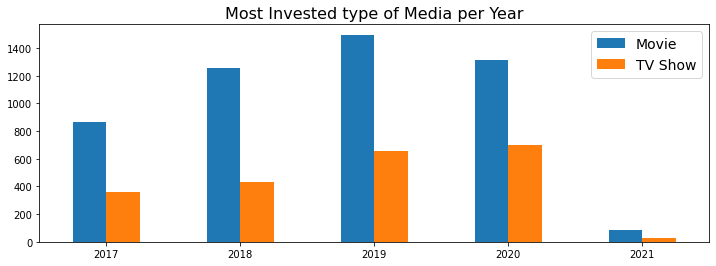

In [ ]:
tempdf = df

#Preprocessing: Deleting rows that contain a NaN value under "date_added"
tempdf.dropna(subset = ["date_added"], inplace=True)
tempdf = tempdf.reset_index()

#Changes the date_added column date format from "M D, Y" to "Y"
tempdf['date_added'] = tempdf['date_added'].str[-4:]

#Groups our data by 'date_added' and 'type' and keeps the last 5 years
inv_media = tempdf.groupby(['date_added', 'type']).size()
inv_media = inv_media.tail(10)

#Prints our data as a bar
inv_media.unstack().plot.bar(figsize= (12,4))
plt.title('Most Invested type of Media per Year', fontsize = 16)
plt.xticks(rotation = 0)
plt.xlabel('', fontsize = 14)
plt.legend(prop={"size":14})
plt.show()

##Query 3
Which country has the most content?

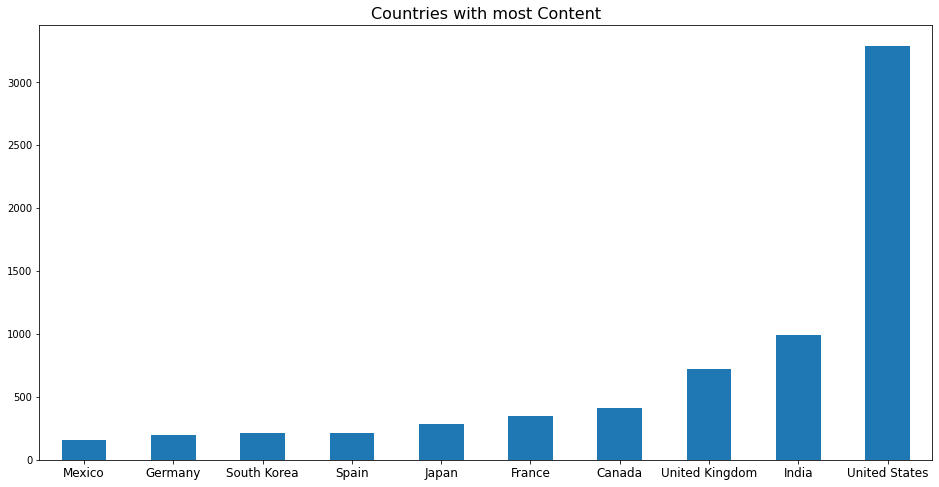

In [ ]:
tempdf = df

#Preprocessing: Deleting rows that contain a NaN value under "country"
tempdf.dropna(subset = ["country"], inplace=True)
tempdf = tempdf.reset_index()

#The 'country' column sometimes has multiple countries in the same entry, so we need to create a seperate row for each country
new_tempdf = tempdf.assign(country=tempdf['country'].str.strip(',').str.replace(', ', ',').str.split(',')).explode('country').reset_index()

#We group our data based on the country and keep the 10 countries with the most content
new_tempdf = new_tempdf.groupby('country').size().sort_values().tail(10)

#We plot our data
new_tempdf.plot.bar(figsize = (16,8))
plt.title('Countries with most Content', fontsize = 16)
plt.xticks(rotation = 0, fontsize = 12)
plt.xlabel('', fontsize = 14)
plt.show()

##Query 4
What kind of content each country has?

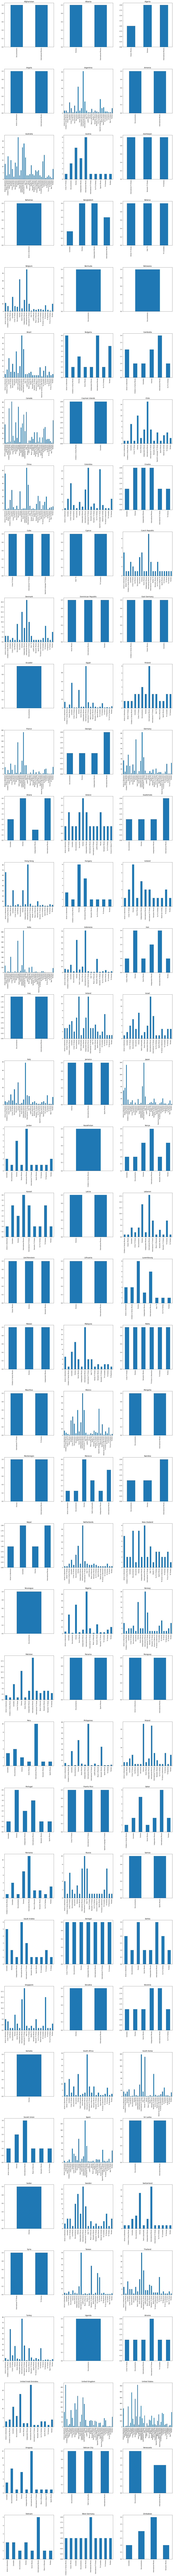

In [ ]:
tempdf = df

#Preprocessing: Deleting rows that contain a NaN value under "country"
tempdf.dropna(subset = ["country"], inplace=True)
tempdf = tempdf.reset_index()

#The 'country' & 'listed_in' columns have multiple entries in the same row, so we need to create a seperate row for each entry
new_tempdf = tempdf.assign(country=tempdf['country'].str.strip(',').str.replace(', ', ',').str.split(',')).explode('country').reset_index()
tempdf =  new_tempdf.assign(listed_in=new_tempdf['listed_in'].str.strip(',').str.replace(', ', ',').str.split(',')).explode('listed_in').reset_index(drop=True)



#We group our data based on the country and keep the 10 countries with the most content
tempdf = tempdf.groupby(['country','listed_in']).size().unstack()

fig = plt.figure(figsize = (25, 400))

i=1
for country, row in tempdf.iterrows():
  row = row.dropna()
  
  ax = fig.add_subplot(40, 3, i)

  row.plot.bar() 
  ax.set_title(country, fontsize = 14)
  ax.set_xlabel('')
  i+=1
  

plt.subplots_adjust(hspace = 0.5)
plt.show()


##Query 5
Who are the actors with the most movies per country?

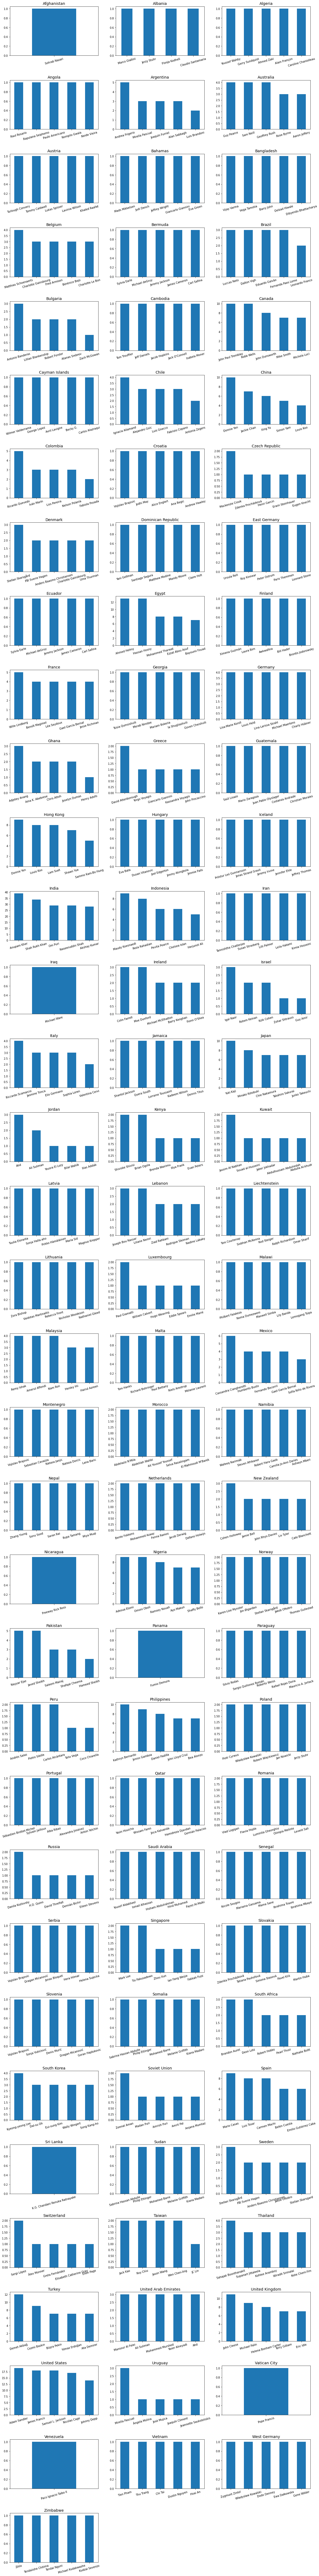

In [ ]:
tempdf = df

#Preprocessing: Deleting rows that contain a NaN value under "country" and "cast"
tempdf.dropna(subset = ["country","cast"], inplace=True)
tempdf = tempdf.reset_index()


#The 'country' & 'cast' columns have multiple entries in the same row, so we need to create a seperate row for each entry
new_tempdf = tempdf.assign(country=tempdf['country'].str.strip(',').str.replace(', ', ',').str.split(',')).explode('country').reset_index(drop=True)
tempdf =  new_tempdf.assign(cast=new_tempdf['cast'].str.strip(',').str.replace(', ', ',').str.split(',')).explode('cast').reset_index(drop=True)

#Keep only the rows that contain movies
tempdf_filtered = tempdf[tempdf['type'] == 'Movie']


# #We group our data based on the country and cast
tempdf_filtered = tempdf_filtered.groupby(['country','cast']).size().unstack()




fig = plt.figure(figsize = (20, 200))


i=1
for country, row in tempdf_filtered.iterrows():
  #Clear NaN values, sort and keep the 5 tops actors with the most movies
  row = row.dropna()
  row = row.sort_values(ascending=False).head(5)
  
  ax = fig.add_subplot(40, 3, i)

  row.plot.bar() 
  ax.set_title(country, fontsize = 14)
  ax.set_xlabel('')
  ax.tick_params('x', labelrotation = 15)
  i+=1
  

plt.subplots_adjust(hspace = 0.5)
plt.show()


##Query 6
What is the number of Movies per suggested age group?

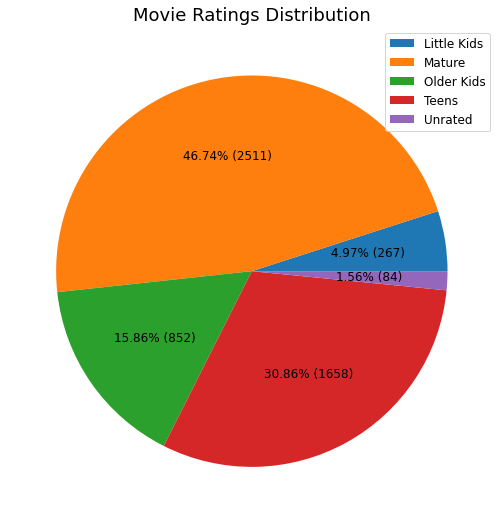

In [ ]:
tempdf = df


Little_Kids = ['G', 'TV-Y', 'TV-G']
Older_Kids = ['PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG']
Teens = ['PG-13', 'TV-14']
Mature = ['R', 'NC-17', 'TV-MA']
Unrated = ['UR', 'NR']

ratings = [Little_Kids, Older_Kids, Teens, Mature, Unrated]
ratings_name = ['Little Kids','Older Kids','Teens','Mature', 'Unrated']

#Preprocessing: Deleting rows that contain a NaN value under "rating"
tempdf.dropna(subset = ["rating"], inplace=True)
tempdf = tempdf.reset_index()

#Keep only the rows that contain movies
tempdf_filtered = tempdf[tempdf['type'] == 'Movie'].reset_index()

#tempdf_filtered.rating.isin(Little_Kids)

#Replacing ratings with the respective category they fall in
for idx, rating in enumerate(ratings):
  tempdf_filtered.loc[tempdf_filtered.rating.isin(rating), 'rating'] = ratings_name[idx]

#Grouping by 'type' and 'rating'
tempdf_filtered = tempdf_filtered.groupby(['type','rating']).size()
ratings_count = tempdf_filtered.to_numpy()

#Sorting the ratings_name list in order to match the order the data appear in "tempdf_filtered"
ratings_name.sort()

plt.figure(figsize= (9,9))
plt.pie(ratings_count, textprops={'fontsize':12,'color':'black'}, autopct = lambda p : '{:.2f}% ({:.0f})'.format(p, (p/100)*ratings_count.sum()))
plt.title('Movie Ratings Distribution', fontsize = 18)
plt.axis('off')
plt.legend(labels = ratings_name, prop={"size":12})
plt.show()

##Query 7
What's the amount of content added per month?

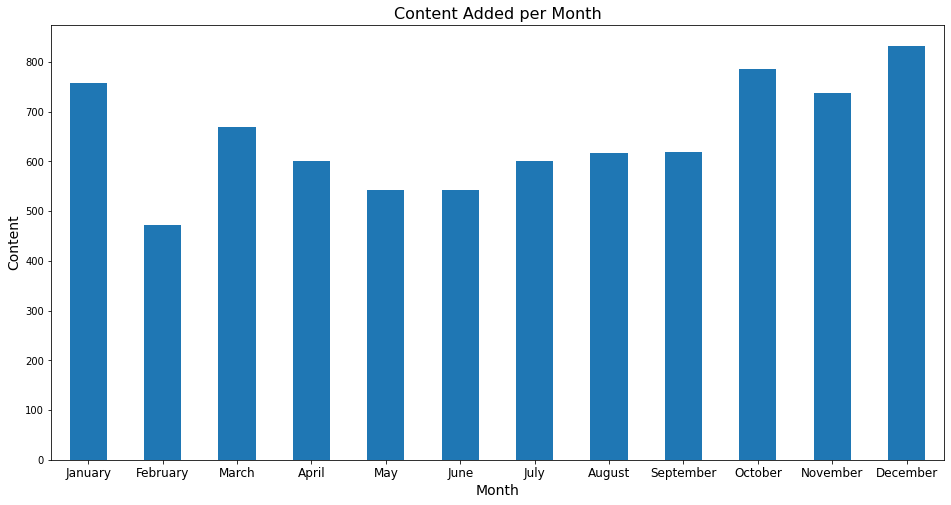

In [78]:
tempdf = df

months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

#Preprocessing: Deleting rows that contain a NaN value under "date_added"
tempdf.dropna(subset = ["date_added"], inplace=True)
tempdf = tempdf.reset_index()


#Changes the date_added column date format from "M D, Y" to "Y"
tempdf['date_added'] = tempdf['date_added'].str.split().str[0]

#We apply "categorical" so that we'll have the months in the "correct" order when sorted
tempdf['date_added'] = pd.Categorical(tempdf['date_added'], categories=months, ordered=True)

tempdf = tempdf.groupby('date_added').size()

#We plot our data
tempdf.plot.bar(figsize = (16,8))
plt.title('Content Added per Month', fontsize = 16)
plt.xticks(rotation = 0, fontsize = 12)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Content', fontsize = 14)

plt.show()

##Query 8
How much content for each genre is available in Netflix?

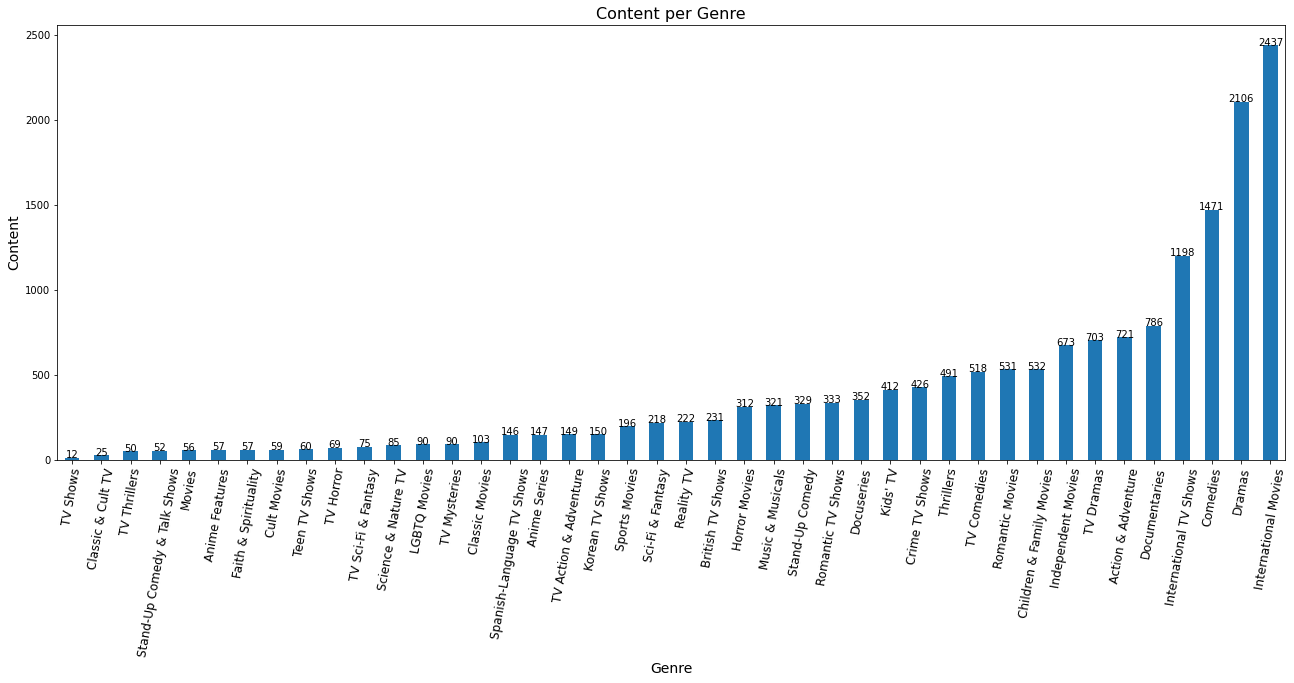

In [94]:
tempdf = df

#The 'listed_in' column has multiple entries in the same row, so we need to create a seperate row for each entry
tempdf =  tempdf.assign(listed_in=tempdf['listed_in'].str.strip(',').str.replace(', ', ',').str.split(',')).explode('listed_in').reset_index(drop=True)



#We group our data based on the country and keep the 10 countries with the most content
tempdf = tempdf.groupby(['listed_in']).size()


#We plot our data
tempdf.sort_values().plot.bar(figsize = (22,8))
for idx, count in enumerate(list(tempdf.sort_values())):
    plt.text(idx, count, str(count), horizontalalignment='center')
plt.title('Content per Genre', fontsize = 16)
plt.xticks(rotation = 80, fontsize = 12)
plt.xlabel('Genre', fontsize = 14)
plt.ylabel('Content', fontsize = 14)

plt.show()

#Recommendation System